In [2]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sklearn
import time
import sys
import os

In [3]:
DeprecationWarning('ignore')
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("train_housing.csv")

In [5]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2,random_state=0)
del df

In [6]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       212
LotArea             0
Street              0
Alley            1097
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          6
MasVnrArea          6
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       551
GarageType         58
GarageYrBlt        58
GarageFinish       58
GarageCars          0
GarageArea          0
GarageQual         58
GarageCond         58
PavedDrive

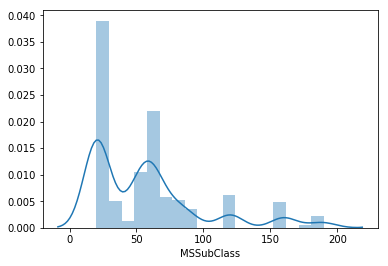

In [100]:
sns.distplot(train['MSSubClass'])

(array([  2.,   3.,  15.,  91., 319., 304., 255., 135.,  32.,  12.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

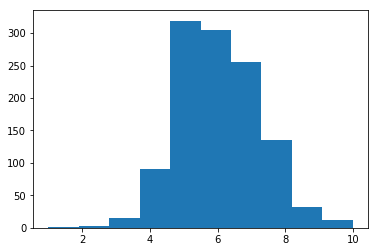

In [101]:
plt.hist(train['OverallQual'])

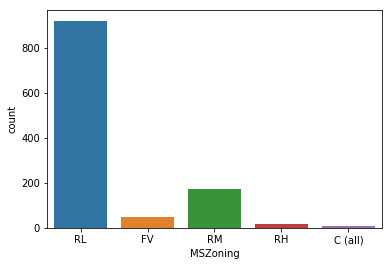

In [102]:
sns.countplot(x=train['MSZoning'])

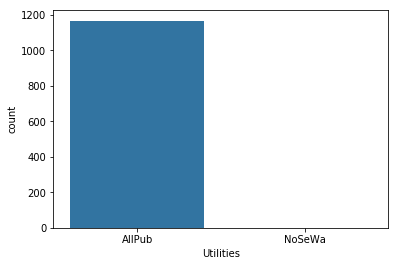

In [103]:
sns.countplot(x=train['Utilities'])

In [104]:
train['Utilities'].value_counts()

AllPub    1167
NoSeWa       1
Name: Utilities, dtype: int64

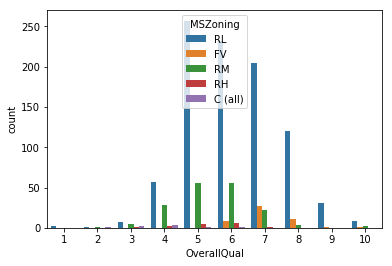

In [10]:
sns.countplot(x=train['OverallQual'],hue=train['MSZoning'])

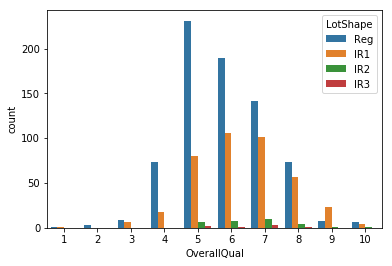

In [11]:
sns.countplot(x=train['OverallQual'],hue=train['LotShape'])

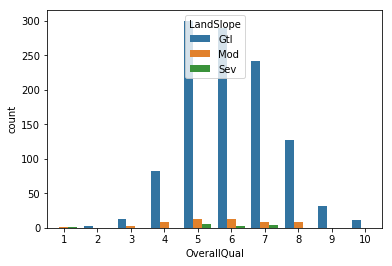

In [12]:
sns.countplot(x=train['OverallQual'],hue=train['LandSlope'])

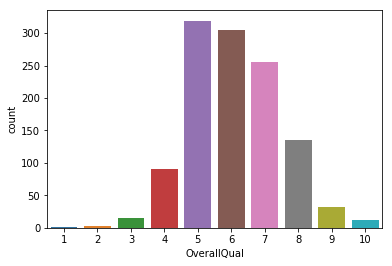

In [13]:
sns.countplot(x=train['OverallQual'])

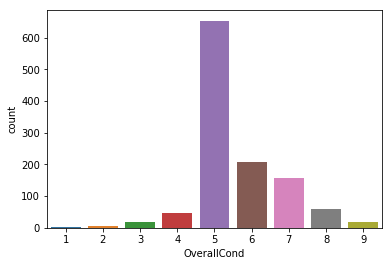

In [14]:
sns.countplot(x=train['OverallCond'])

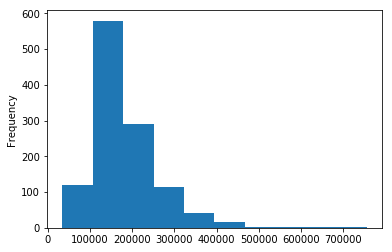

In [15]:
train['SalePrice'].plot.hist()

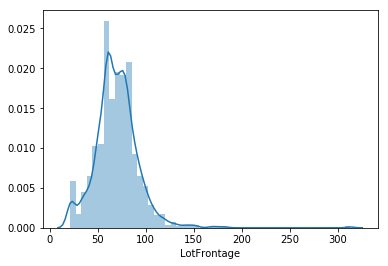

In [16]:
sns.distplot(train.LotFrontage.dropna())

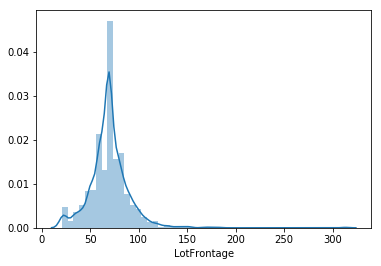

In [17]:
sns.distplot(train.LotFrontage.fillna(train.LotFrontage.median(),inplace=False))

In [18]:
train.LotFrontage.fillna(train.LotFrontage.median(),inplace=True)

In [9]:
train.LotFrontage.min(),train.LotFrontage.max()

(21.0, 313.0)

In [9]:
train.LotFrontage.mode()

0    60.0
dtype: float64

In [10]:
train.LotArea.min(),train.LotArea.max()

(1300, 215245)

In [12]:
train.LotArea.mean()

10589.672945205479

In [12]:
train.YearBuilt.min(),train.YearBuilt.max()

(1872, 2010)

In [13]:
train.YearBuilt.mean()

1970.890410958904

In [13]:
train.YearRemodAdd.min(),train.YearRemodAdd.max()

(1950, 2010)

In [14]:
train.YearRemodAdd.mean()

1984.6926369863013

In [14]:
train.MasVnrArea.min(),train.MasVnrArea.max()

(0.0, 1600.0)

In [16]:
train.MasVnrArea.median()

0.0

In [15]:
train.BsmtFinSF1.min(),train.BsmtFinSF1.max()

(0, 2260)

In [18]:
train.BsmtFinSF1.mean()

439.8904109589041

In [16]:
train.BsmtFinSF2.min(),train.BsmtFinSF2.max()

(0, 1120)

In [19]:
train.BsmtFinSF2.mean()

45.571917808219176

In [17]:
train.BsmtUnfSF.min(),train.BsmtUnfSF.max()

(0, 2153)

In [20]:
train.BsmtUnfSF.mean()

568.0496575342465

In [18]:
train.TotalBsmtSF.min(),train.TotalBsmtSF.max()

(0, 3206)

In [21]:
train.TotalBsmtSF.mean()

1053.51198630137

In [20]:
train['1stFlrSF'].min(),train['1stFlrSF'].max()

(334, 3228)

In [22]:
train['1stFlrSF'].mean()

1160.958904109589

In [22]:
train['2ndFlrSF'].min(),train['2ndFlrSF'].max()

(0, 1872)

In [23]:
train['2ndFlrSF'].mean()

351.47945205479454

In [23]:
train.LowQualFinSF.min(),train.LowQualFinSF.max()

(0, 572)

In [25]:
train.LowQualFinSF.median()

0.0

In [24]:
train.GrLivArea.min(),train.GrLivArea.max()

(334, 4676)

In [26]:
train.GrLivArea.mean()

1518.882705479452

In [25]:
train.BsmtFullBath.min(),train.BsmtFullBath.max()

(0, 3)

In [28]:
train.BsmtFullBath.median()

0.0

In [26]:
train.BsmtHalfBath.min(),train.BsmtHalfBath.max()

(0, 2)

In [29]:
train.BsmtFullBath.value_counts()

0    686
1    472
2      9
3      1
Name: BsmtFullBath, dtype: int64

In [31]:
train.BsmtHalfBath.median()

0.0

In [27]:
train.FullBath.min(),train.FullBath.max()

(0, 3)

In [32]:
train.FullBath.median()

2.0

In [28]:
train.HalfBath.min(),train.HalfBath.max()

(0, 2)

In [33]:
train.HalfBath.median()

0.0

In [31]:
train.TotRmsAbvGrd.min(),train.TotRmsAbvGrd.max()

(2, 14)

In [35]:
train.TotRmsAbvGrd.median()

6.0

In [32]:
train.Fireplaces.min(),train.Fireplaces.max()

(0, 3)

In [36]:
train.Fireplaces.median()

1.0

In [33]:
train.GarageYrBlt.min(),train.GarageYrBlt.max()

(1900.0, 2010.0)

In [37]:
train.GarageYrBlt.mean()

1978.1405405405405

In [34]:
train.GarageCars.min(),train.GarageCars.max()

(0, 4)

In [38]:
train.GarageCars.median()

2.0

In [35]:
train.GarageArea.min(),train.GarageArea.max()

(0, 1390)

In [39]:
train.GarageArea.mean()

473.63270547945206

In [36]:
train.WoodDeckSF.min(),train.WoodDeckSF.max()

(0, 736)

In [40]:
train.WoodDeckSF.mean()

94.49828767123287

In [37]:
train.OpenPorchSF.min(),train.OpenPorchSF.max()

(0, 547)

In [59]:
train.OpenPorchSF.median()

26.0

In [38]:
train.EnclosedPorch.min(),train.EnclosedPorch.max()

(0, 552)

In [47]:
train.EnclosedPorch.median()

0.0

In [40]:
train['3SsnPorch'].min(),train['3SsnPorch'].max()

(0, 508)

In [44]:
train['3SsnPorch'].median()

0.0

In [41]:
train.ScreenPorch.min(),train.ScreenPorch.max()

(0, 480)

In [46]:
train.ScreenPorch.median()

0.0

In [42]:
train.PoolArea.min(),train.PoolArea.max()

(0, 738)

In [49]:
train.PoolArea.median()

0.0

In [43]:
train.MiscVal.min(),train.MiscVal.max()

(0, 15500)

In [51]:
train.MiscVal.median()

0.0

In [44]:
train.MoSold.min(),train.MoSold.max()

(1, 12)

In [53]:
train.MoSold.median()

6.0

In [45]:
train.YrSold.min(),train.YrSold.max()

(2006, 2010)

In [55]:
train.YrSold.median()

2008.0

In [46]:
train.BedroomAbvGr.min(),train.BedroomAbvGr.max()

(0, 8)

In [57]:
train.BedroomAbvGr.median()

3.0

In [47]:
train.KitchenAbvGr.min(),train.KitchenAbvGr.max()

(0, 3)

In [58]:
train.KitchenAbvGr.median()

1.0

In [19]:
train.Alley.fillna("No Class",inplace=True)

In [20]:
train['LotShape'].value_counts()

Reg    735
IR1    396
IR2     30
IR3      7
Name: LotShape, dtype: int64

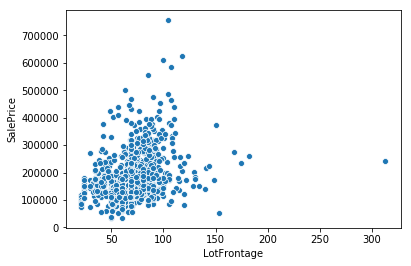

In [21]:
sns.scatterplot(x=train['LotFrontage'],y=train['SalePrice'])

In [22]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [65]:
cat=train.select_dtypes(include=float)
for col in cat.columns:
    print(col)

LotFrontage
MasVnrArea
GarageYrBlt


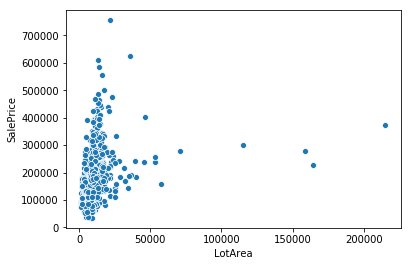

In [23]:
sns.scatterplot(x=train['LotArea'],y=train['SalePrice'])

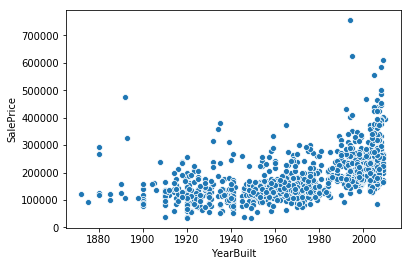

In [24]:
sns.scatterplot(x=train['YearBuilt'],y=train['SalePrice'])

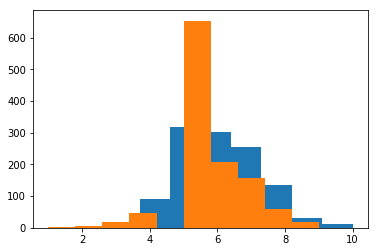

In [25]:
plt.hist(train['OverallQual'])
plt.hist(train['OverallCond'])
plt.show()

In [26]:
from sklearn.linear_model import Ridge as slr

In [27]:
from sklearn.linear_model import Lasso as sll

In [28]:
column=train.columns
for col in column:
    if train[col].isnull().sum()>0:
        print(col,train[col].isnull().sum())

MasVnrType 6
MasVnrArea 6
BsmtQual 28
BsmtCond 28
BsmtExposure 28
BsmtFinType1 28
BsmtFinType2 29
Electrical 1
FireplaceQu 551
GarageType 58
GarageYrBlt 58
GarageFinish 58
GarageQual 58
GarageCond 58
PoolQC 1164
Fence 954
MiscFeature 1119


all the columns having null values

In [11]:
def drop(train):
    train['LotFrontage'].fillna(69,inplace=True)
    train['MasVnrType'].fillna("NoClass",inplace=True)
    train['Alley'].fillna("NoClass",inplace=True)
    train['BsmtQual'].fillna("Na",inplace=True)
    train['BsmtCond'].fillna("Na",inplace=True)
    train['BsmtExposure'].fillna("Na",inplace=True)
    train['BsmtFinType1'].fillna("Na",inplace=True)
    train['BsmtFinType2'].fillna("Na",inplace=True)
    train['MiscFeature'].fillna("Na",inplace=True)
    train['PoolQC'].fillna("Na",inplace=True)
    train['FireplaceQu'].fillna("Na",inplace=True)
    train['GarageFinish'].fillna("Na",inplace=True)
    train['GarageType'].fillna("Na",inplace=True)
    train['GarageYrBlt'].fillna(0,inplace=True)
    train['GarageQual'].fillna("Na",inplace=True)
    train['GarageCond'].fillna("Na",inplace=True)
    train['Fence'].fillna("Na",inplace=True)
    train['MasVnrArea'].fillna(0.0,inplace=True)
    train['Electrical'].fillna("No Class",inplace=True)
    return train
train=drop(train)

In [45]:
train.SaleCondition.value_counts()

Normal     969
Partial     98
Abnorml     79
Family      12
Alloca       7
AdjLand      3
Name: SaleCondition, dtype: int64

In [5]:
train.Street.value_counts()

Pave    1163
Grvl       5
Name: Street, dtype: int64

In [29]:
train['MasVnrType'].value_counts()

None       701
BrkFace    338
Stone      112
BrkCmn      11
Name: MasVnrType, dtype: int64

In [30]:
train['MasVnrType'].fillna("NoClass",inplace=True)

In [31]:
train['BsmtQual'].value_counts()

TA    528
Gd    490
Ex     94
Fa     28
Name: BsmtQual, dtype: int64

In [32]:
train['BsmtQual'].fillna("Na",inplace=True)

In [33]:
train['BsmtCond'].value_counts()

TA    1046
Gd      55
Fa      37
Po       2
Name: BsmtCond, dtype: int64

In [34]:
train['BsmtCond'].fillna("Na",inplace=True)

In [7]:
train['Alley'].value_counts()

Grvl    37
Pave    34
Name: Alley, dtype: int64

In [35]:
train['BsmtExposure'].value_counts()

No    768
Av    174
Gd    106
Mn     92
Name: BsmtExposure, dtype: int64

In [36]:
train['BsmtExposure'].fillna("Na",inplace=True)

In [37]:
train['BsmtFinType1'].value_counts()

Unf    353
GLQ    330
ALQ    172
BLQ    123
Rec    106
LwQ     56
Name: BsmtFinType1, dtype: int64

In [38]:
train['BsmtFinType1'].fillna("Na",inplace=True)

In [39]:
train['BsmtFinType2'].value_counts()

Unf    1003
LwQ      42
Rec      39
BLQ      30
ALQ      14
GLQ      11
Name: BsmtFinType2, dtype: int64

In [40]:
train['BsmtFinType2'].fillna("Na",inplace=True)

In [8]:
train['FireplaceQu'].value_counts()

Gd    295
TA    257
Fa     29
Ex     19
Po     17
Name: FireplaceQu, dtype: int64

In [42]:
train['Fireplaces'].value_counts()

0    551
1    522
2     92
3      3
Name: Fireplaces, dtype: int64

In [43]:
train['FireplaceQu'].fillna("Na",inplace=True)

In [44]:
train['GarageType'].value_counts()

Attchd     696
Detchd     315
BuiltIn     74
Basment     14
2Types       6
CarPort      5
Name: GarageType, dtype: int64

In [45]:
train['GarageType'].fillna("Na",inplace=True)

In [46]:
train['GarageYrBlt'].fillna(0,inplace=True)

In [47]:
train['GarageFinish'].value_counts()

Unf    488
RFn    337
Fin    285
Name: GarageFinish, dtype: int64

In [48]:
train['GarageFinish'].fillna("Na",inplace=True)

In [49]:
train['GarageQual'].fillna("Na",inplace=True)

In [50]:
train['GarageCond'].fillna("Na",inplace=True)

In [51]:
train['PoolArea'].value_counts()

0      1164
738       1
648       1
576       1
512       1
Name: PoolArea, dtype: int64

In [52]:
train['PoolQC'].fillna("Na",inplace=True)

In [53]:
train['Fence'].value_counts()

MnPrv    113
GdPrv     51
GdWo      43
MnWw       7
Name: Fence, dtype: int64

In [54]:
train['Fence'].fillna("Na",inplace=True)

In [55]:
train['MiscFeature'].value_counts()

Shed    45
Othr     2
Gar2     2
Name: MiscFeature, dtype: int64

In [56]:
train['MiscFeature'].fillna("Na",inplace=True)

In [57]:
train['Electrical'].value_counts()

SBrkr    1060
FuseA      82
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [58]:
train['Electrical'].fillna("No Class",inplace=True)

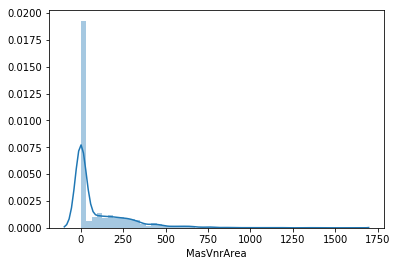

In [59]:
sns.distplot(train.MasVnrArea.dropna())

In [60]:
train.MasVnrArea.fillna(train.MasVnrArea.median(),inplace=True)

In [16]:
from sklearn.preprocessing import LabelEncoder

def labels(train):
    cat=train.select_dtypes(include=object)
    for col in cat.columns:
        label=LabelEncoder()
        train[col]=label.fit_transform(train[col])
    return train

In [155]:
train=labels(train)

In [156]:
def x_and_y(train):
    x=train.drop(['SalePrice'],axis=1)
    y=train['SalePrice']
    return x,y
x_train,y_train=x_and_y(train)

In [157]:
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
prediction=lin_model.predict(x_train)
prediction

array([328229.79088091,  91363.00414985, 124618.21983618, ...,
       128692.35232266, 191312.45858142, 189448.76236726])

In [159]:
score=r2_score(y_train,prediction)
score

0.8867064748482094

In [152]:
def drop(train):
    train['LotFrontage'].fillna(69,inplace=True)
    train['MasVnrType'].fillna("NoClass",inplace=True)
    train['Alley'].fillna("No Class",inplace=True)
    train['BsmtQual'].fillna("Na",inplace=True)
    train['BsmtCond'].fillna("Na",inplace=True)
    train['BsmtExposure'].fillna("Na",inplace=True)
    train['BsmtFinType1'].fillna("Na",inplace=True)
    train['BsmtFinType2'].fillna("Na",inplace=True)
    train['MiscFeature'].fillna("Na",inplace=True)
    train['PoolQC'].fillna("Na",inplace=True)
    train['FireplaceQu'].fillna("Na",inplace=True)
    train['GarageFinish'].fillna("Na",inplace=True)
    train['GarageType'].fillna("Na",inplace=True)
    train['GarageYrBlt'].fillna(0,inplace=True)
    train['GarageQual'].fillna("Na",inplace=True)
    train['GarageCond'].fillna("Na",inplace=True)
    train['Fence'].fillna("Na",inplace=True)
    train['MasVnrArea'].fillna(0.0,inplace=True)
    train['Electrical'].fillna("No Class",inplace=True)
    return train

In [153]:
#train=drop(train)

In [160]:
test=drop(test)
test=labels(test)
x_test,y_test=x_and_y(test)

In [161]:
prediction_test=lin_model.predict(x_test)

In [162]:
score_test=r2_score(y_test,prediction_test)
score_test

0.5698825926883626

In [19]:
df=pd.read_csv("test_housing.csv")

In [164]:
column=df.columns
for col in column:
    if df[col].isnull().sum()>0:
        print(col,df[col].isnull().sum())

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [108]:
df['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

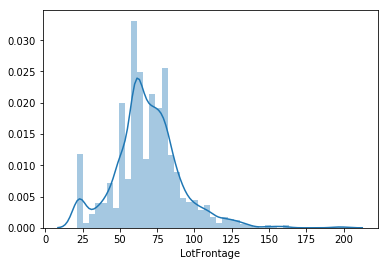

In [112]:
sns.distplot(df.LotFrontage.dropna())

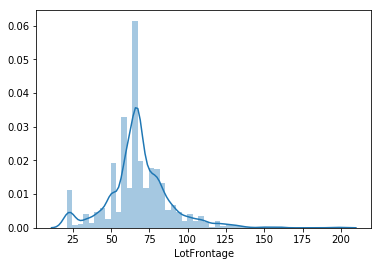

In [114]:
sns.distplot(df.LotFrontage.fillna(df.LotFrontage.median(),inplace=False))

In [115]:
df.LotFrontage.median()

67.0

In [117]:
df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [118]:
df['Alley'].value_counts()

Grvl    70
Pave    37
Name: Alley, dtype: int64

In [120]:
df['Exterior1st'].value_counts()

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [121]:
df['Exterior2nd'].value_counts()

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

In [122]:
df['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [123]:
df.MasVnrArea.mean()

100.70914127423822

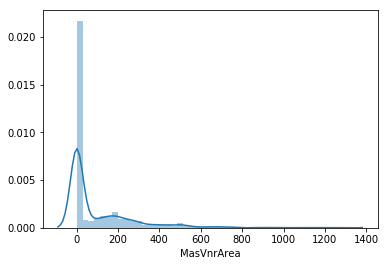

In [124]:
sns.distplot(df.MasVnrArea.dropna())

In [125]:
df.MasVnrArea.mode()

0    0.0
dtype: float64

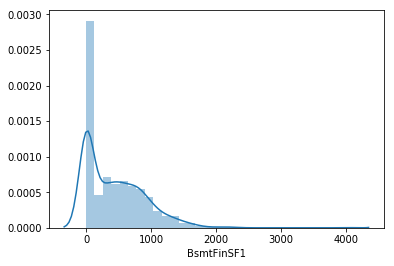

In [128]:
sns.distplot(df.BsmtFinSF1.dropna())

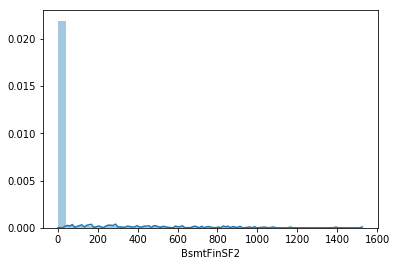

In [130]:
sns.distplot(df.BsmtFinSF2.dropna())

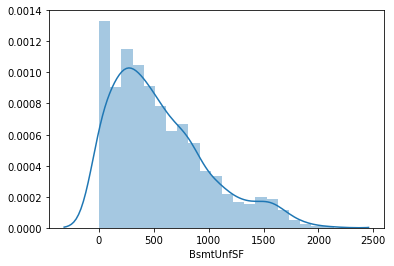

In [131]:
sns.distplot(df.BsmtUnfSF.dropna())

In [132]:
df.BsmtUnfSF.median()

460.0

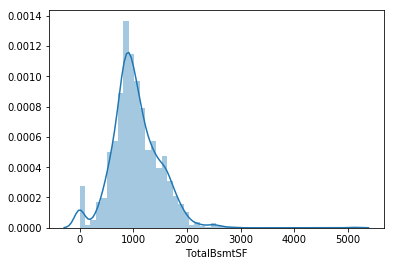

In [133]:
sns.distplot(df.TotalBsmtSF.dropna())

In [134]:
df.TotalBsmtSF.median()

988.0

In [137]:
df['BsmtFullBath'].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [139]:
df['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

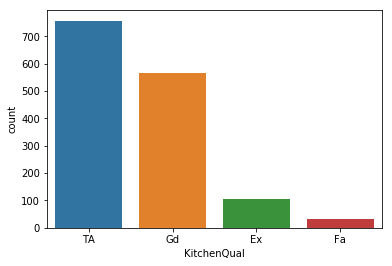

In [141]:
sns.countplot(df.KitchenQual.dropna())

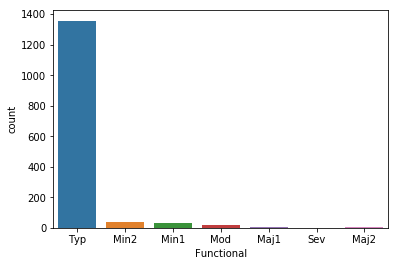

In [142]:
sns.countplot(df.Functional.dropna())

In [147]:
df['MiscFeature'].value_counts()

Shed    46
Gar2     3
Othr     2
Name: MiscFeature, dtype: int64

In [145]:
df['GarageCars'].value_counts()

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64

In [148]:
df['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64

In [150]:
df['Fence'].value_counts()

MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: Fence, dtype: int64

In [149]:
df['PoolQC'].value_counts()

Ex    2
Gd    1
Name: PoolQC, dtype: int64

In [20]:
def drop_test(df):
    df['Utilities'].fillna("AllPub",inplace=True)
    df['LotFrontage'].fillna(69,inplace=True)
    df['MSZoning'].fillna("NoClass",inplace=True)
    df['Alley'].fillna("Na",inplace=True)
    df['Exterior1st'].fillna("NoClass",inplace=True)
    df['Exterior2nd'].fillna("NoClass",inplace=True)
    df['MasVnrType'].fillna("NoClass",inplace=True)
    df['MasVnrArea'].fillna(0.0,inplace=True)
    df['BsmtQual'].fillna("Na",inplace=True)
    df['BsmtCond'].fillna("Na",inplace=True)
    df['BsmtExposure'].fillna("Na",inplace=True)
    df['BsmtFinType1'].fillna("Na",inplace=True)
    df['BsmtFinType2'].fillna("Na",inplace=True)
    df['BsmtFinSF2'].fillna(0.0,inplace=True)
    df['BsmtFinSF1'].fillna(0.0,inplace=True)
    df['BsmtUnfSF'].fillna(460,inplace=True)
    df['TotalBsmtSF'].fillna(988,inplace=True)
    df['BsmtFullBath'].fillna(0.0,inplace=True)
    df['BsmtHalfBath'].fillna(0.0,inplace=True)
    df['FireplaceQu'].fillna("Na",inplace=True)
    df['GarageFinish'].fillna("Na",inplace=True)
    df['GarageType'].fillna("Na",inplace=True)
    df['GarageYrBlt'].fillna(0,inplace=True)
    df['GarageQual'].fillna("Na",inplace=True)
    df['GarageArea'].fillna(0.0,inplace=True)
    df['GarageCond'].fillna("Na",inplace=True)
    df['Fence'].fillna("Na",inplace=True)
    df['MiscFeature'].fillna("Na",inplace=True)
    df['PoolQC'].fillna("Na",inplace=True)
    df['KitchenQual'].fillna("TA",inplace=True)
    df['Functional'].fillna("Typ",inplace=True)
    df['GarageCars'].fillna(2.0,inplace=True)
    df['SaleType'].fillna("NoClass",inplace=True)
    
    return df

In [21]:
df=drop_test(df)
df=labels(df)

In [172]:
prediction_test=lin_model.predict(df)

In [174]:
prediction_test

array([ 94720.89361088, 174734.76970065, 148522.78184821, ...,
       140965.32395684, 100168.72087911, 208091.38200333])